In [1]:
from google.colab import files
 
uploaded = files.upload()

Saving zee-ratings.dat to zee-ratings.dat


# Business Case:Zee Recommender Systems 

# Problem Statement:

Create a Recommender System to show personalized movie recommendations based on ratings given by a user and other users similar to them in order to improve user experience.

# Recommendation Systems

Recommendation engines are a subclass of machine learning which generally deal with ranking or rating products / users. Loosely defined, a recommender system is a system which predicts ratings a user might give to a specific item. These predictions will then be ranked and returned back to the user.

There are many different ways to build recommender systems, some use algorithmic and formulaic approaches like Page Rank while others use more modelling centric approaches like collaborative filtering, content based, link prediction, etc

# Collaborative Filtering Systems

Collaborative filtering is the process of predicting the interests of a user by identifying preferences and information from many users. This is done by filtering data for information or patterns using techniques involving collaboration among multiple agents, data sources, etc. The underlying intuition behind collaborative filtering is that if users A and B have similar taste in a product, then A and B are likely to have similar taste in other products as well.

# Content Based Systems

Content based systems generate recommendations based on the users preferences and profile. They try to match users to items which they’ve liked previously. The level of similarity between items is generally established based on attributes of items liked by the user. Unlike most collaborative filtering models which leverage ratings between target user and other users, content based models focus on the ratings provided by the target user themselves. In essence, the content based approach leverages different sources of data to generate recommendations.

# Data Dictionary:



RATINGS FILE DESCRIPTION: 


All ratings are contained in the file "ratings.dat" and are in the following format:

UserID::MovieID::Rating::Timestamp


* UserIDs range between 1 and 6040
* MovieIDs range between 1 and 3952
* Ratings are made on a 5-star scale (whole-star ratings only)
* Timestamp is represented in seconds
* Each user has at least 20 ratings


USERS FILE DESCRIPTION:

User information is in the file "users.dat" and is in the following format:

UserID::Gender::Age::Occupation::Zip-code

All demographic information is provided voluntarily by the users and is not checked for accuracy.
Only users who have provided some demographic information are included in this data set.

* Gender is denoted by a "M" for male and "F" for female
* Age is chosen from the following ranges:
        1: "Under 18"
        18: "18-24"
        25: "25-34"
        35: "35-44"
        45: "45-49"
        50: "50-55"
        56: "56+"
* Occupation is chosen from the following choices:
        0: "other" or not specified
        1: "academic/educator"
        2: "artist"
        3: "clerical/admin"
        4: "college/grad student"
        5: "customer service"
        6: "doctor/health care"
        7: "executive/managerial"
        8: "farmer"
        9: "homemaker"
        10: "K-12 student"
        11: "lawyer"
        12: "programmer"
        13: "retired"
        14: "sales/marketing"
        15: "scientist"
        16: "self-employed"
        17: "technician/engineer"
        18: "tradesman/craftsman"
        19: "unemployed"
        20: "writer"

MOVIES FILE DESCRIPTION:

Movie information is in the file "movies.dat" and is in the following format:

MovieID::Title::Genres

* Titles are identical to titles provided by the IMDB (including year of release)
* Genres are pipe-separated and are selected from the following genres:
        Action
        Adventure
        Animation
        Children's
        Comedy
        Crime
        Documentary
        Drama
        Fantasy
        Film-Noir
        Horror
        Musical
        Mystery
        Romance
        Sci-Fi
        Thriller
        War
        Western

In [2]:
# Analysis
#Importing Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [3]:
movies = pd.read_fwf('zee-movies.dat', encoding='ISO-8859-1')
ratings = pd.read_fwf('zee-ratings.dat', encoding='ISO-8859-1')
users = pd.read_fwf('zee-users.dat', encoding='ISO-8859-1')	

# Data Formatting

In [4]:
#Formatting Movies Dataset
movies.head()

,Movie ID::Title::Genres,Unnamed: 1,Unnamed: 2
0,1::Toy Story (1995)::Animation|Children's|Comedy,NaN,NaN
1,2::Jumanji (1995)::Adventure|Children's|Fantasy,NaN,NaN
2,3::Grumpier Old Men (1995)::Comedy|Romance,NaN,NaN
3,4::Waiting to Exhale (1995)::Comedy|Drama,NaN,NaN
4,5::Father of the Bride Part II (1995)::Comedy,NaN,NaN


In [5]:
#Dropping Unnamed column which is not Required
movies.drop(columns=['Unnamed: 1','Unnamed: 2'], axis=1, inplace=True)

In [6]:
movies=movies['Movie ID::Title::Genres'].str.split('::',expand=True)
movies.columns=['Movie ID','Title','Genres']

In [7]:
movies.rename(columns={'Movie ID':'MovieID'},inplace=True)

In [8]:
movies.head(5)

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
#Formatting Ratings Dataset
ratings.head()

,UserID::MovieID::Rating::Timestamp
0,1::1193::5::978300760
1,1::661::3::978302109
2,1::914::3::978301968
3,1::3408::4::978300275
4,1::2355::5::978824291


In [10]:
ratings=ratings['UserID::MovieID::Rating::Timestamp'].str.split('::',expand=True)
ratings.columns=['UserID','MovieID','Rating','Timestamp']

In [11]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [12]:
#Formatting Ratings Dataset
users.head()

,UserID::Gender::Age::Occupation::Zip-code
0,1::F::1::10::48067
1,2::M::56::16::70072
2,3::M::25::15::55117
3,4::M::45::7::02460
4,5::M::25::20::55455


In [13]:
users=users['UserID::Gender::Age::Occupation::Zip-code'].str.split('::',expand=True)
users.columns=['UserID','Gender','Age','Occupation','Zip-code']

In [ ]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [14]:
users.replace({'Age':{'1':"Under 18",
                     '18':"18-24",
                     '25':"25-34",
                     '35':"35-44",
                     '45':"45-49",
                     '50':"50-55",
                     '56':"56+"}},inplace=True)

In [15]:
users.replace({'Occupation':{'0': "other",
    '1': "academic/educator",
    '2': "artist",
    '3': "clerical/admin",
    '4': "college/grad student",
    '5': "customer service",
    '6': "doctor/health care",
    '7': "executive/managerial",
    '8': "farmer",
    '9': "homemaker",
    '10': "K-12 student",
    '11': "lawyer",
    '12': "programmer",
    '13': "retired",
    '14': "sales/marketing",
    '15': "scientist",
    '16': "self-employed",
    '17': "technician/engineer",
    '18': "tradesman/craftsman",
    '19': "unemployed",
    '20': "writer"
}},inplace=True)

In [16]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,Under 18,K-12 student,48067
1,2,M,56+,self-employed,70072
2,3,M,25-34,scientist,55117
3,4,M,45-49,executive/managerial,02460
4,5,M,25-34,writer,55455


In [17]:
#Merging the DataFrames
df_1=pd.merge(movies,ratings,how='inner',on='MovieID')
df_1.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [18]:
df=pd.merge(df_1,users,how='inner',on='UserID')
df.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,Under 18,K-12 student,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,Under 18,K-12 student,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,Under 18,K-12 student,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantas,1,4,978300760,F,Under 18,K-12 student,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,Under 18,K-12 student,48067


In [19]:
df.shape

(1000209, 10)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  object
 1   Title       1000209 non-null  object
 2   Genres      996144 non-null   object
 3   UserID      1000209 non-null  object
 4   Rating      1000209 non-null  object
 5   Timestamp   1000209 non-null  object
 6   Gender      1000209 non-null  object
 7   Age         1000209 non-null  object
 8   Occupation  1000209 non-null  object
 9   Zip-code    1000209 non-null  object
dtypes: object(10)
memory usage: 83.9+ MB


# Feature Engineering and Data Cleaning

In [21]:
#extracting Release Year
df['Release_Year']=df['Title'].apply(lambda x:x.split("(")[-1].split(')')[0])

In [22]:
df['Release_Year'].unique()

array(['1995', '1977', '1993', '1992', '1937', '1991', '1996', '1964',
       '1939', '1958', '1950', '1941', '1965', '1982', '1975', '1987',
       '1962', '1989', '1985', '1959', '1997', '1998', '1988', '1942',
       '1947', '1999', '1980', '1983', '1986', '1990', '2000', '1994',
       '1978', '1961', '1984', '1972', '1976', '1981', '1973', '1974',
       '1940',
       'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bo',
       '1952', '1954', '1953', '1944', '1968', '1957', '1946', '1949',
       '1951', '1963', '1971', '1979', '1967', '1966', '1948', '1933',
       '1970', '1969', '1930', '1955', '1956', '', '1920', '1925', '1938',
       '195', '1960', '1935', '1932', '1931', '1945', '1943', '1934',
       '1936', '1929',
       "Don't Be a Menace to South Central While Drinking Your Juice in the",
       '1926', "En compagnie d'Antonin Arta", 'Die Macht der B', '1927',
       '19', '1922', 'Los Amantes del Círculo Polar', '1919', '1921',
       "Travolti da un

In [23]:
#some data need to be cleaned according to release year
for i in range(0,len(df)):
    if df['Release_Year'][i]=='19':
        df['Release_Year'][i]='1998'
    elif df['Release_Year'][i]=="Don't Be a Menace to South Central While Drinking Your Juice in the":
        df['Release_Year'][i]='1996'
    elif df['Release_Year'][i]=="Travolti da un insolito destino nell'azzurro mare d'A":
        df['Release_Year'][i]='1974'
    elif df['Release_Year'][i]=="Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bo":
        df['Release_Year'][i]='1964'
    elif df['Release_Year'][i]=="En compagnie d'Antonin Arta":
        df['Release_Year'][i]='1993'
    elif df['Release_Year'][i]=="Die Macht der B":
        df['Release_Year'][i]='2022'
    elif df['Release_Year'][i]=='Los Amantes del Círculo Polar':
        df['Release_Year'][i]='1998'
    elif df['Release_Year'][i]=="Ceux qui m'aiment prendront":
        df['Release_Year'][i]='1998'
    elif df['Release_Year'][i]=='1':
        df['Release_Year'][i]='1970'
    elif df['Release_Year'][i]=='195':
        df['Release_Year'][i]='1954'
    elif df['Release_Year'][i]=='':
        df['Release_Year'][i]='1934'

In [24]:
df['Release_Year'].unique()

array(['1995', '1977', '1993', '1992', '1937', '1991', '1996', '1964',
       '1939', '1958', '1950', '1941', '1965', '1982', '1975', '1987',
       '1962', '1989', '1985', '1959', '1997', '1998', '1988', '1942',
       '1947', '1999', '1980', '1983', '1986', '1990', '2000', '1994',
       '1978', '1961', '1984', '1972', '1976', '1981', '1973', '1974',
       '1940', '1952', '1954', '1953', '1944', '1968', '1957', '1946',
       '1949', '1951', '1963', '1971', '1979', '1967', '1966', '1948',
       '1933', '1970', '1969', '1930', '1955', '1956', '1934', '1920',
       '1925', '1938', '1960', '1935', '1932', '1931', '1945', '1943',
       '1936', '1929', '1926', '2022', '1927', '1922', '1919', '1921',
       '1923', '1928'], dtype=object)

In [25]:
df['Title']=df['Title'].apply(lambda x:x.split("(")[0])

In [26]:
import re
def preprocess_string(string):
    new_string= re.sub('[^A-Za-z ]+', '', string).lower().strip()
    return new_string

In [27]:
#TO remove special characters and space from Title column after splitting
df['Title']=df['Title'].apply(lambda x: preprocess_string(str(x)))

In [28]:
# convert string to an integer
df['MovieID'] = df['MovieID'].astype(int)
df['UserID'] = df['UserID'].astype(int)
df['Rating'] = df['Rating'].astype(int)
df['Timestamp'] = df['Timestamp'].astype(int)
df['Release_Year'] = df['Release_Year'].astype(int)

In [29]:
from datetime import datetime

#Reducing Timestamp which are in seconds to Hour
df['Timestamp'] = df['Timestamp'].apply(lambda x: datetime.fromtimestamp(x).hour)

In [30]:
df['Zip-code']=df['Zip-code'].apply(lambda x:x.split('-')[0])

In [31]:
df

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Release_Year
0,1,toy story,Animation|Children's|Comedy,1,5,23,F,Under 18,K-12 student,48067,1995
1,48,pocahontas,Animation|Children's|Musical|Romance,1,5,23,F,Under 18,K-12 student,48067,1995
2,150,apollo,Drama,1,5,22,F,Under 18,K-12 student,48067,1995
3,260,star wars episode iv a new hope,Action|Adventure|Fantas,1,4,22,F,Under 18,K-12 student,48067,1977
4,527,schindlers list,Drama|War,1,5,23,F,Under 18,K-12 student,48067,1993
...,...,...,...,...,...,...,...,...,...,...,...
1000204,3513,rules of engagement,Drama|Thriller,5727,4,15,M,25-34,college/grad student,92843,2000
1000205,3535,american psycho,Comedy|Horror|Thriller,5727,2,15,M,25-34,college/grad student,92843,2000
1000206,3536,keeping the faith,Comedy|Romance,5727,5,15,M,25-34,college/grad student,92843,2000
1000207,3555,u,Action|Thriller,5727,3,15,M,25-34,college/grad student,92843,2000


# Calculating Average Time spent and ratings done by users

In [32]:
users=df.groupby('UserID').agg({'Rating':'mean','Timestamp':'mean'}).rename(columns={'Rating':'Average_Rating',
                                                                                     'Timestamp':'Average_Timestamp'})
users=users.reset_index()

In [33]:
users1=df.groupby('UserID').agg({'Rating':'count'}).rename(columns={'Rating':'Rating_Counts'})
users1=users1.reset_index()

In [34]:
users=pd.merge(users,users1,how='left')
users

,UserID,Average_Rating,Average_Timestamp,Rating_Counts
0,1,4.188679,22.245283,53
1,2,3.713178,21.155039,129
2,3,3.901961,21.000000,51
3,4,4.190476,20.000000,21
4,5,3.146465,6.015152,198
...,...,...,...,...
6035,6036,3.302928,5.219595,888
6036,6037,3.717822,1.603960,202
6037,6038,3.800000,7.400000,20
6038,6039,3.878049,22.560976,123


In [35]:
# Merging this data to Main Dataframe
df=pd.merge(df,users,how='left',on='UserID')
df

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Release_Year,Average_Rating,Average_Timestamp,Rating_Counts
0,1,toy story,Animation|Children's|Comedy,1,5,23,F,Under 18,K-12 student,48067,1995,4.188679,22.245283,53
1,48,pocahontas,Animation|Children's|Musical|Romance,1,5,23,F,Under 18,K-12 student,48067,1995,4.188679,22.245283,53
2,150,apollo,Drama,1,5,22,F,Under 18,K-12 student,48067,1995,4.188679,22.245283,53
3,260,star wars episode iv a new hope,Action|Adventure|Fantas,1,4,22,F,Under 18,K-12 student,48067,1977,4.188679,22.245283,53
4,527,schindlers list,Drama|War,1,5,23,F,Under 18,K-12 student,48067,1993,4.188679,22.245283,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,3513,rules of engagement,Drama|Thriller,5727,4,15,M,25-34,college/grad student,92843,2000,3.176471,15.000000,51
1000205,3535,american psycho,Comedy|Horror|Thriller,5727,2,15,M,25-34,college/grad student,92843,2000,3.176471,15.000000,51
1000206,3536,keeping the faith,Comedy|Romance,5727,5,15,M,25-34,college/grad student,92843,2000,3.176471,15.000000,51
1000207,3555,u,Action|Thriller,5727,3,15,M,25-34,college/grad student,92843,2000,3.176471,15.000000,51


In [36]:
df.shape

(1000209, 14)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 14 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   MovieID            1000209 non-null  int64  
 1   Title              1000209 non-null  object 
 2   Genres             996144 non-null   object 
 3   UserID             1000209 non-null  int64  
 4   Rating             1000209 non-null  int64  
 5   Timestamp          1000209 non-null  int64  
 6   Gender             1000209 non-null  object 
 7   Age                1000209 non-null  object 
 8   Occupation         1000209 non-null  object 
 9   Zip-code           1000209 non-null  object 
 10  Release_Year       1000209 non-null  int64  
 11  Average_Rating     1000209 non-null  float64
 12  Average_Timestamp  1000209 non-null  float64
 13  Rating_Counts      1000209 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 114.5+ MB


In [38]:
# Dupluicate value check
if df.shape[0] == df.drop_duplicates().shape[0] :
    print('No duplicates Found')
else:
    duplicates = df.shape[0] - df.drop_duplicates().shape[0]
    print('{} duplicates found'.format(duplicates))

No duplicates Found


In [39]:
df_numerical=df.select_dtypes(exclude='object')
df_categorical=df.select_dtypes(include='object')

In [41]:
df_numerical.columns

Index(['MovieID', 'UserID', 'Rating', 'Timestamp', 'Release_Year',
       'Average_Rating', 'Average_Timestamp', 'Rating_Counts'],
      dtype='object')

In [40]:
df_categorical.columns

Index(['Title', 'Genres', 'Gender', 'Age', 'Occupation', 'Zip-code'], dtype='object')

# Univariate analysis

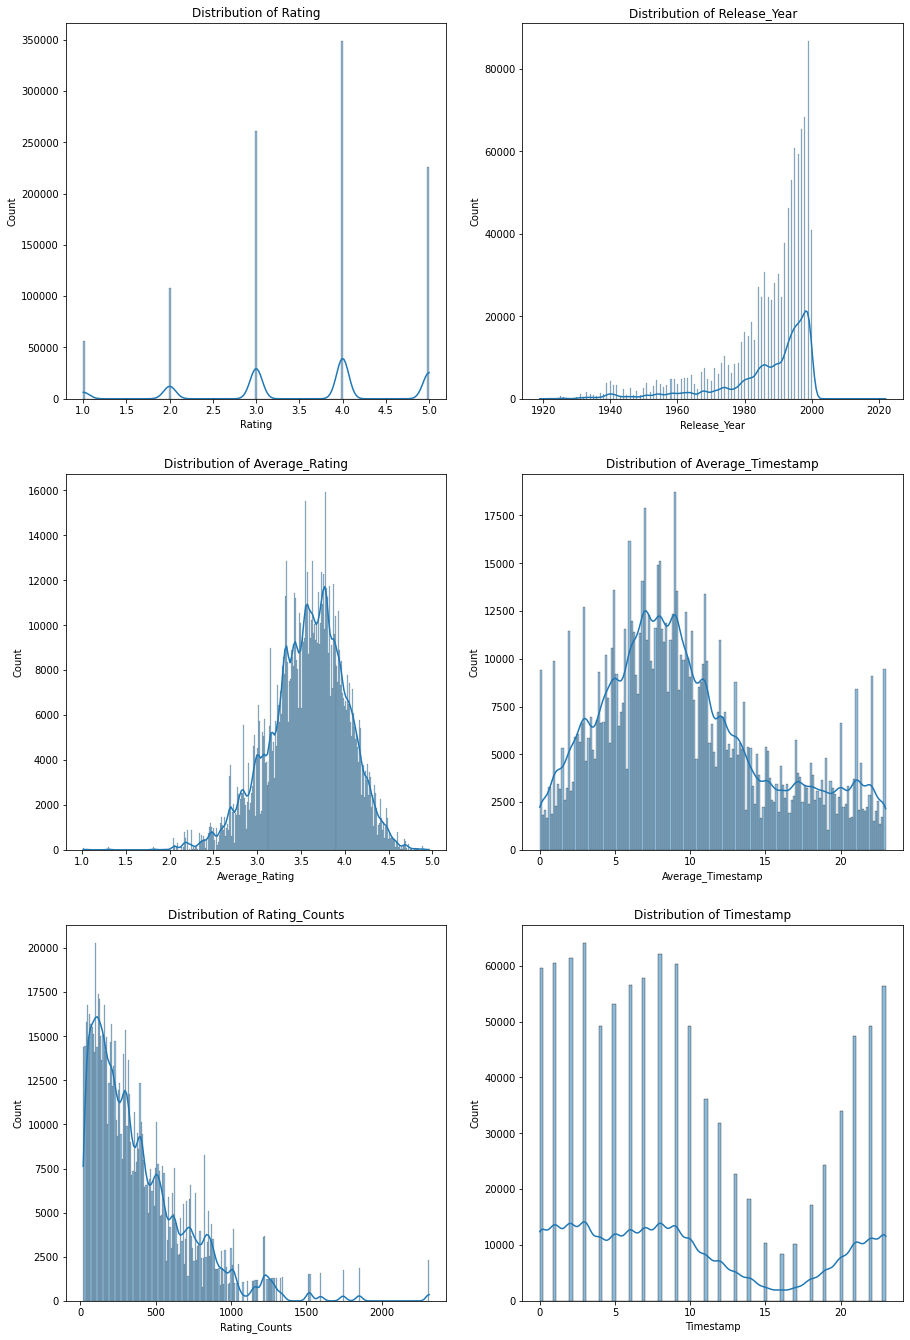

In [ ]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
fig.subplots_adjust(top=1.9)

sns.histplot(data=df, x="Rating", kde=True, ax=axis[0,0])
axis[0,0].set_title('Distribution of Rating')
sns.histplot(data=df, x="Release_Year", kde=True, ax=axis[0,1])
axis[0,1].set_title('Distribution of Release_Year')
sns.histplot(data=df, x="Average_Rating", kde=True, ax=axis[1,0])
axis[1,0].set_title('Distribution of Average_Rating')
sns.histplot(data=df, x="Average_Timestamp", kde=True, ax=axis[1,1])
axis[1,1].set_title('Distribution of Average_Timestamp')
sns.histplot(data=df, x="Rating_Counts", kde=True, ax=axis[2,0])
axis[2,0].set_title('Distribution of Rating_Counts')
sns.histplot(data=df, x="Timestamp", kde=True, ax=axis[2,1])
axis[2,1].set_title('Distribution of Timestamp')
plt.show()

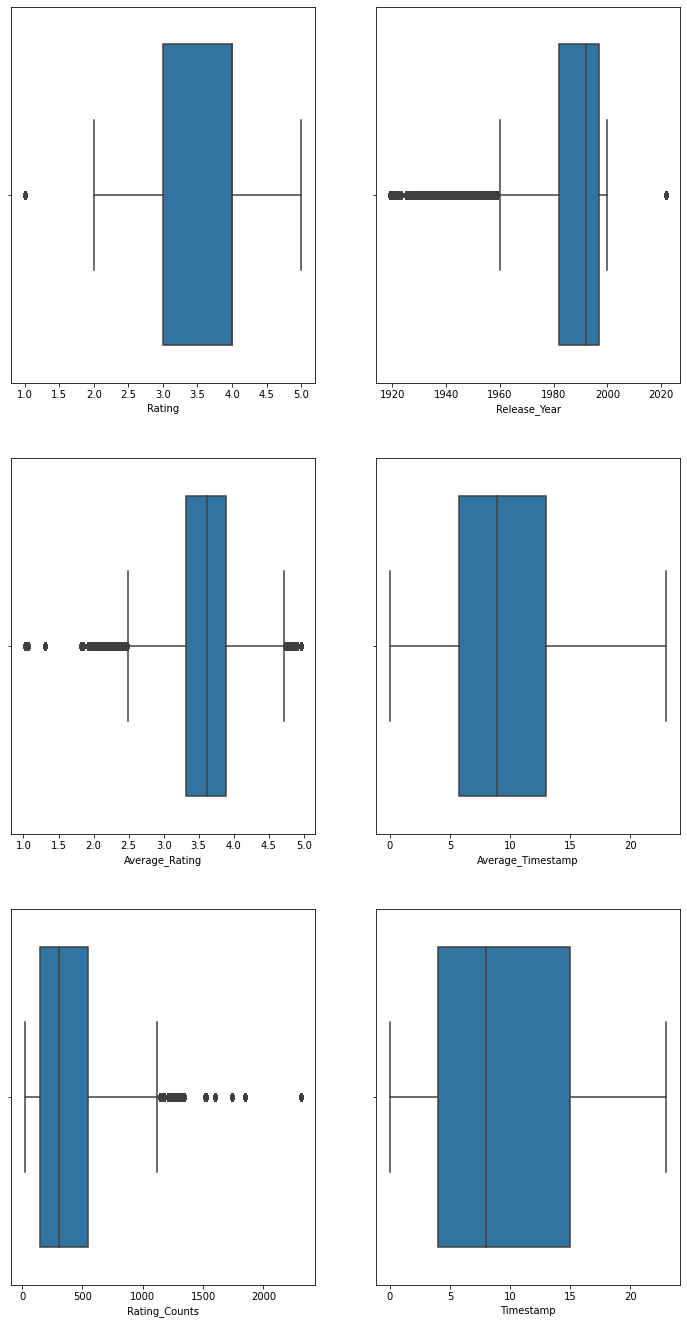

In [ ]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.9)

sns.boxplot(data=df, x="Rating", ax=axis[0,0])
sns.boxplot(data=df, x="Release_Year", ax=axis[0,1])
sns.boxplot(data=df, x="Average_Rating", ax=axis[1,0])
sns.boxplot(data=df, x="Average_Timestamp", ax=axis[1,1])
sns.boxplot(data=df, x="Rating_Counts", ax=axis[2,0])
sns.boxplot(data=df, x="Timestamp", ax=axis[2,1])
plt.show()

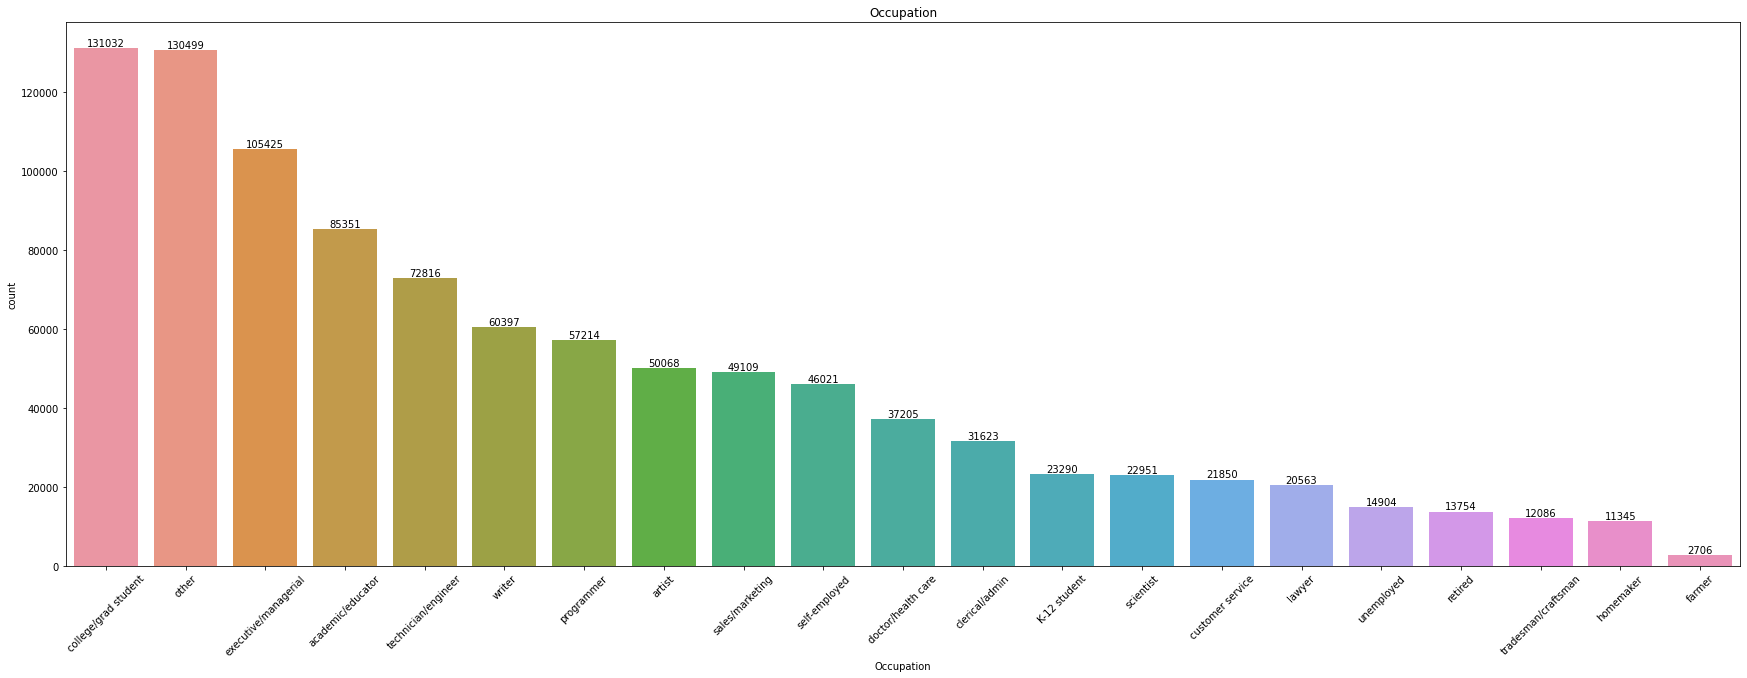

In [ ]:
plt.figure(figsize=(30,10))
ax = sns.countplot(data = df, 
              x = 'Occupation', 
              order = df['Occupation'].value_counts().index[:], linewidth=0.3)
ax.bar_label(ax.containers[0])
plt.title('Occupation')
plt.xticks(rotation=45)
plt.show()

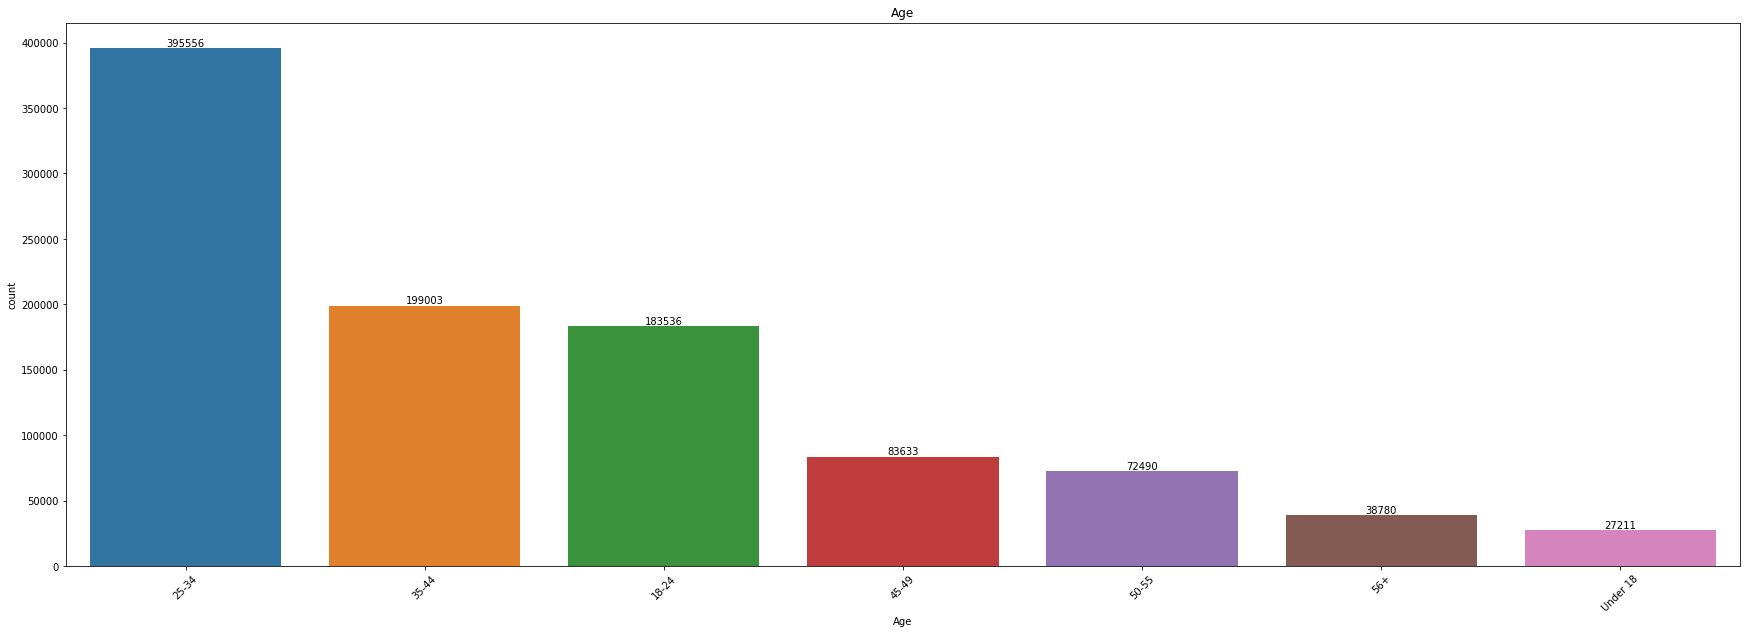

In [ ]:
plt.figure(figsize=(30,10))
ax = sns.countplot(data = df, 
              x = 'Age', 
              order = df['Age'].value_counts().index[:], linewidth=0.3)
ax.bar_label(ax.containers[0])
plt.title('Age')
plt.xticks(rotation=45)
plt.show()

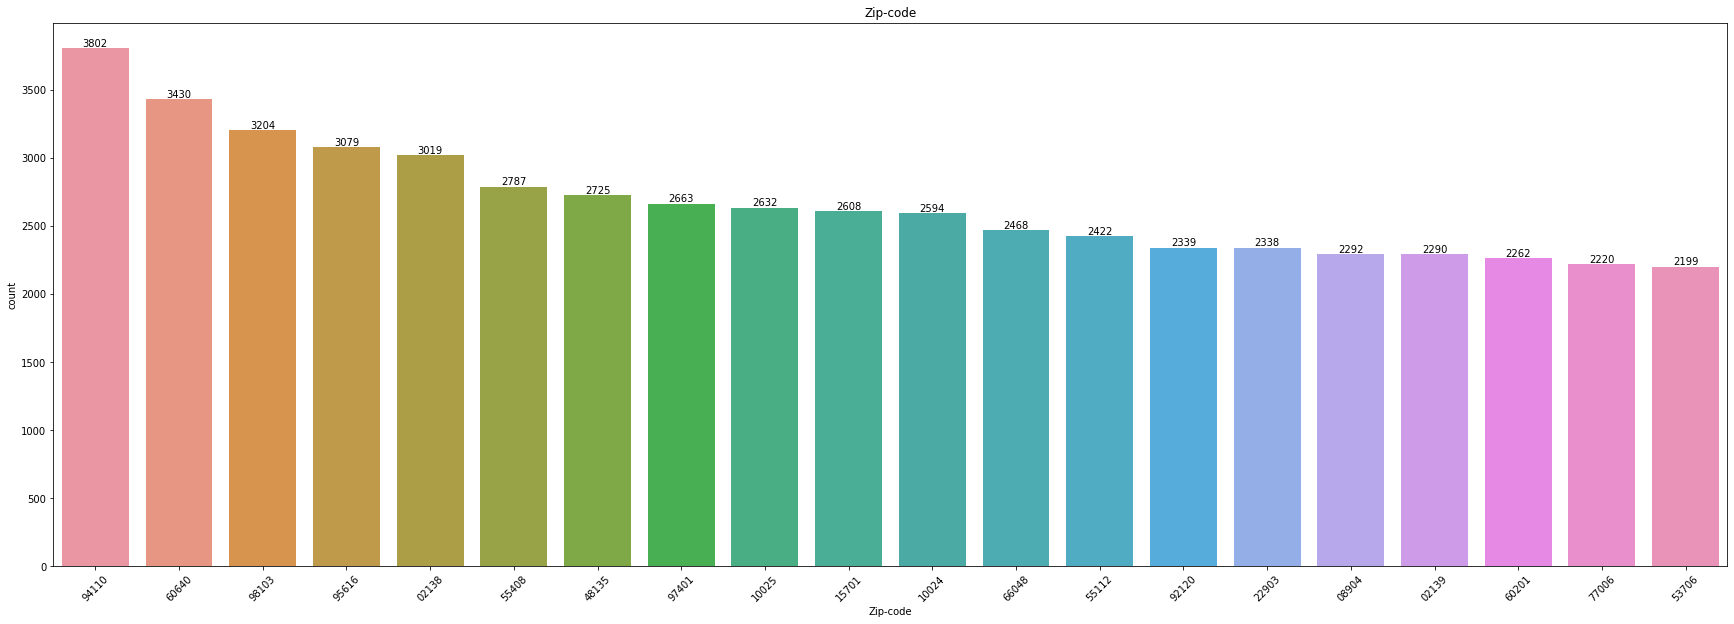

In [ ]:
plt.figure(figsize=(30,10))
ax = sns.countplot(data = df, 
              x = 'Zip-code', 
              order = df['Zip-code'].value_counts().index[:20], linewidth=0.3)
ax.bar_label(ax.containers[0])
plt.title('Zip-code')
plt.xticks(rotation=45)
plt.show()

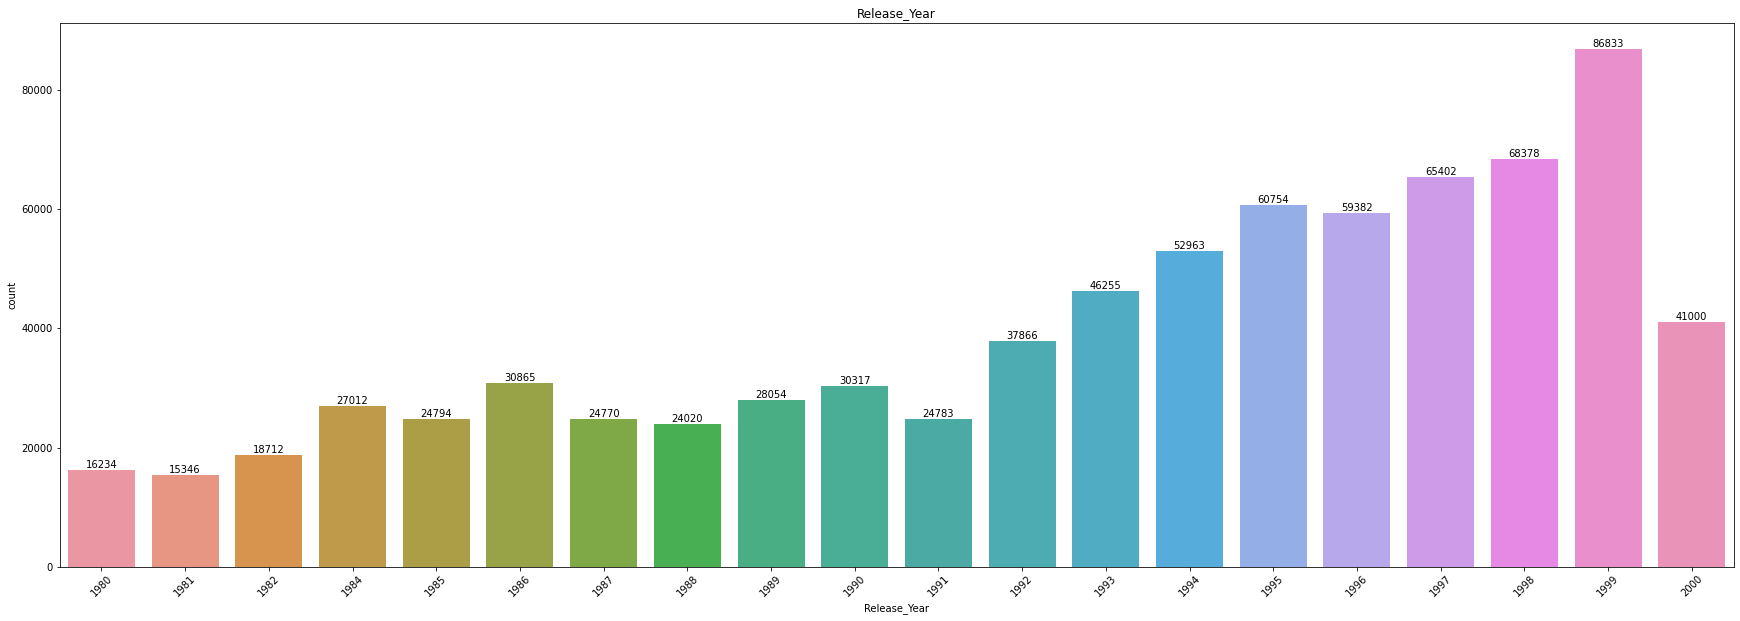

In [ ]:
plt.figure(figsize=(30,10))
ax = sns.countplot(data = df, 
              x = 'Release_Year', 
              order = sorted(df['Release_Year'].value_counts().index[:20]), linewidth=0.3)
ax.bar_label(ax.containers[0])
plt.title('Release_Year')
plt.xticks(rotation=45)
plt.show()

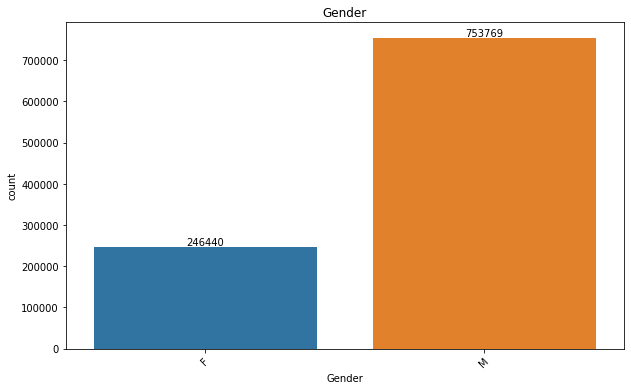

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data = df, 
              x = 'Gender', 
              order = sorted(df['Gender'].value_counts().index[:]), linewidth=0.3)
ax.bar_label(ax.containers[0])
plt.title('Gender')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Replacing Gender with 0 and 1 for analysis
df.replace({'Gender':{'F':0,'M':1}},inplace=True)

# Bivariate and Multivariate Analysis

<AxesSubplot:xlabel='Timestamp', ylabel='Gender'>

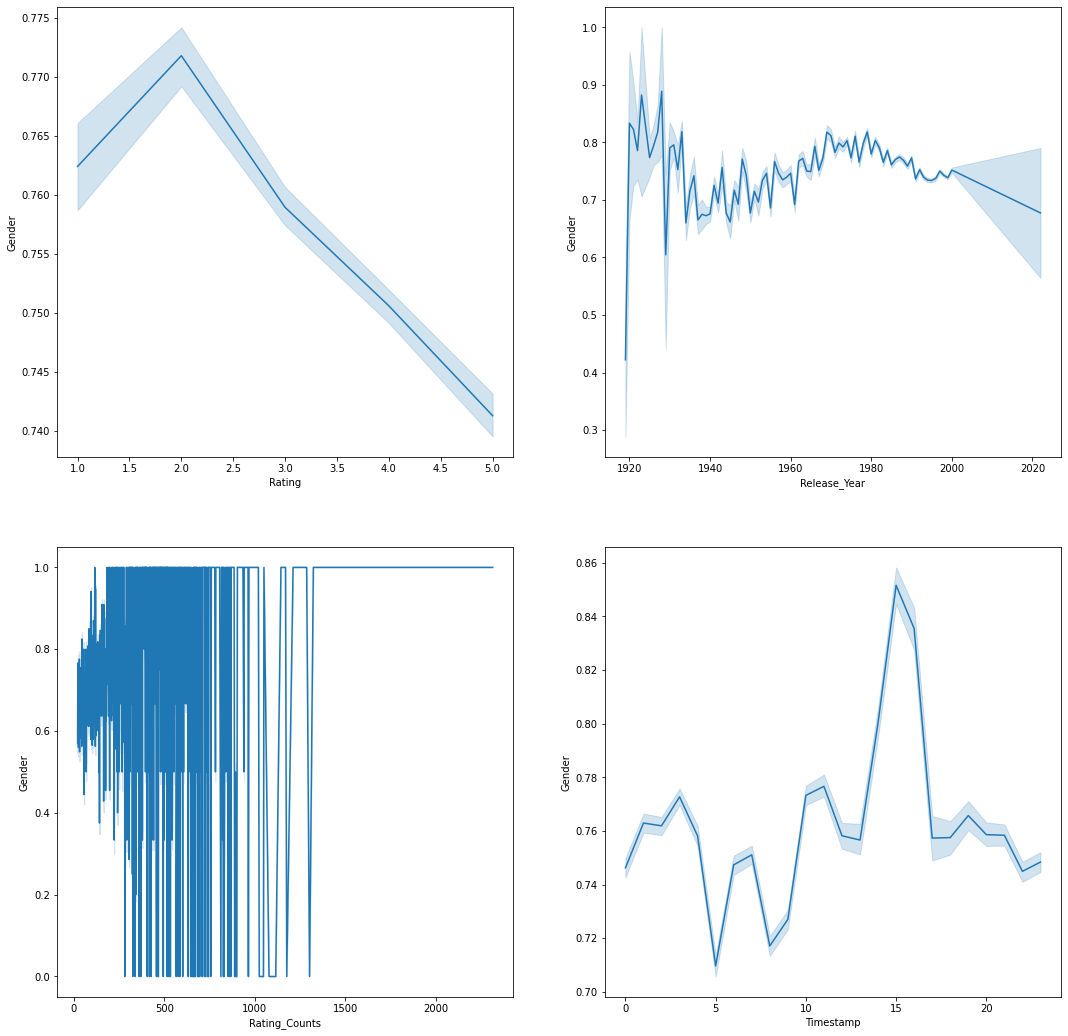

In [ ]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
fig.subplots_adjust(top=1.5)

sns.lineplot(x='Rating', y='Gender', data=df, ax=axis[0,0])
sns.lineplot(x='Release_Year',y='Gender', data=df, ax=axis[0,1])
sns.lineplot(x='Rating_Counts',y='Gender', data=df, ax=axis[1,0])
sns.lineplot(x='Timestamp',y='Gender', data=df, ax=axis[1,1])

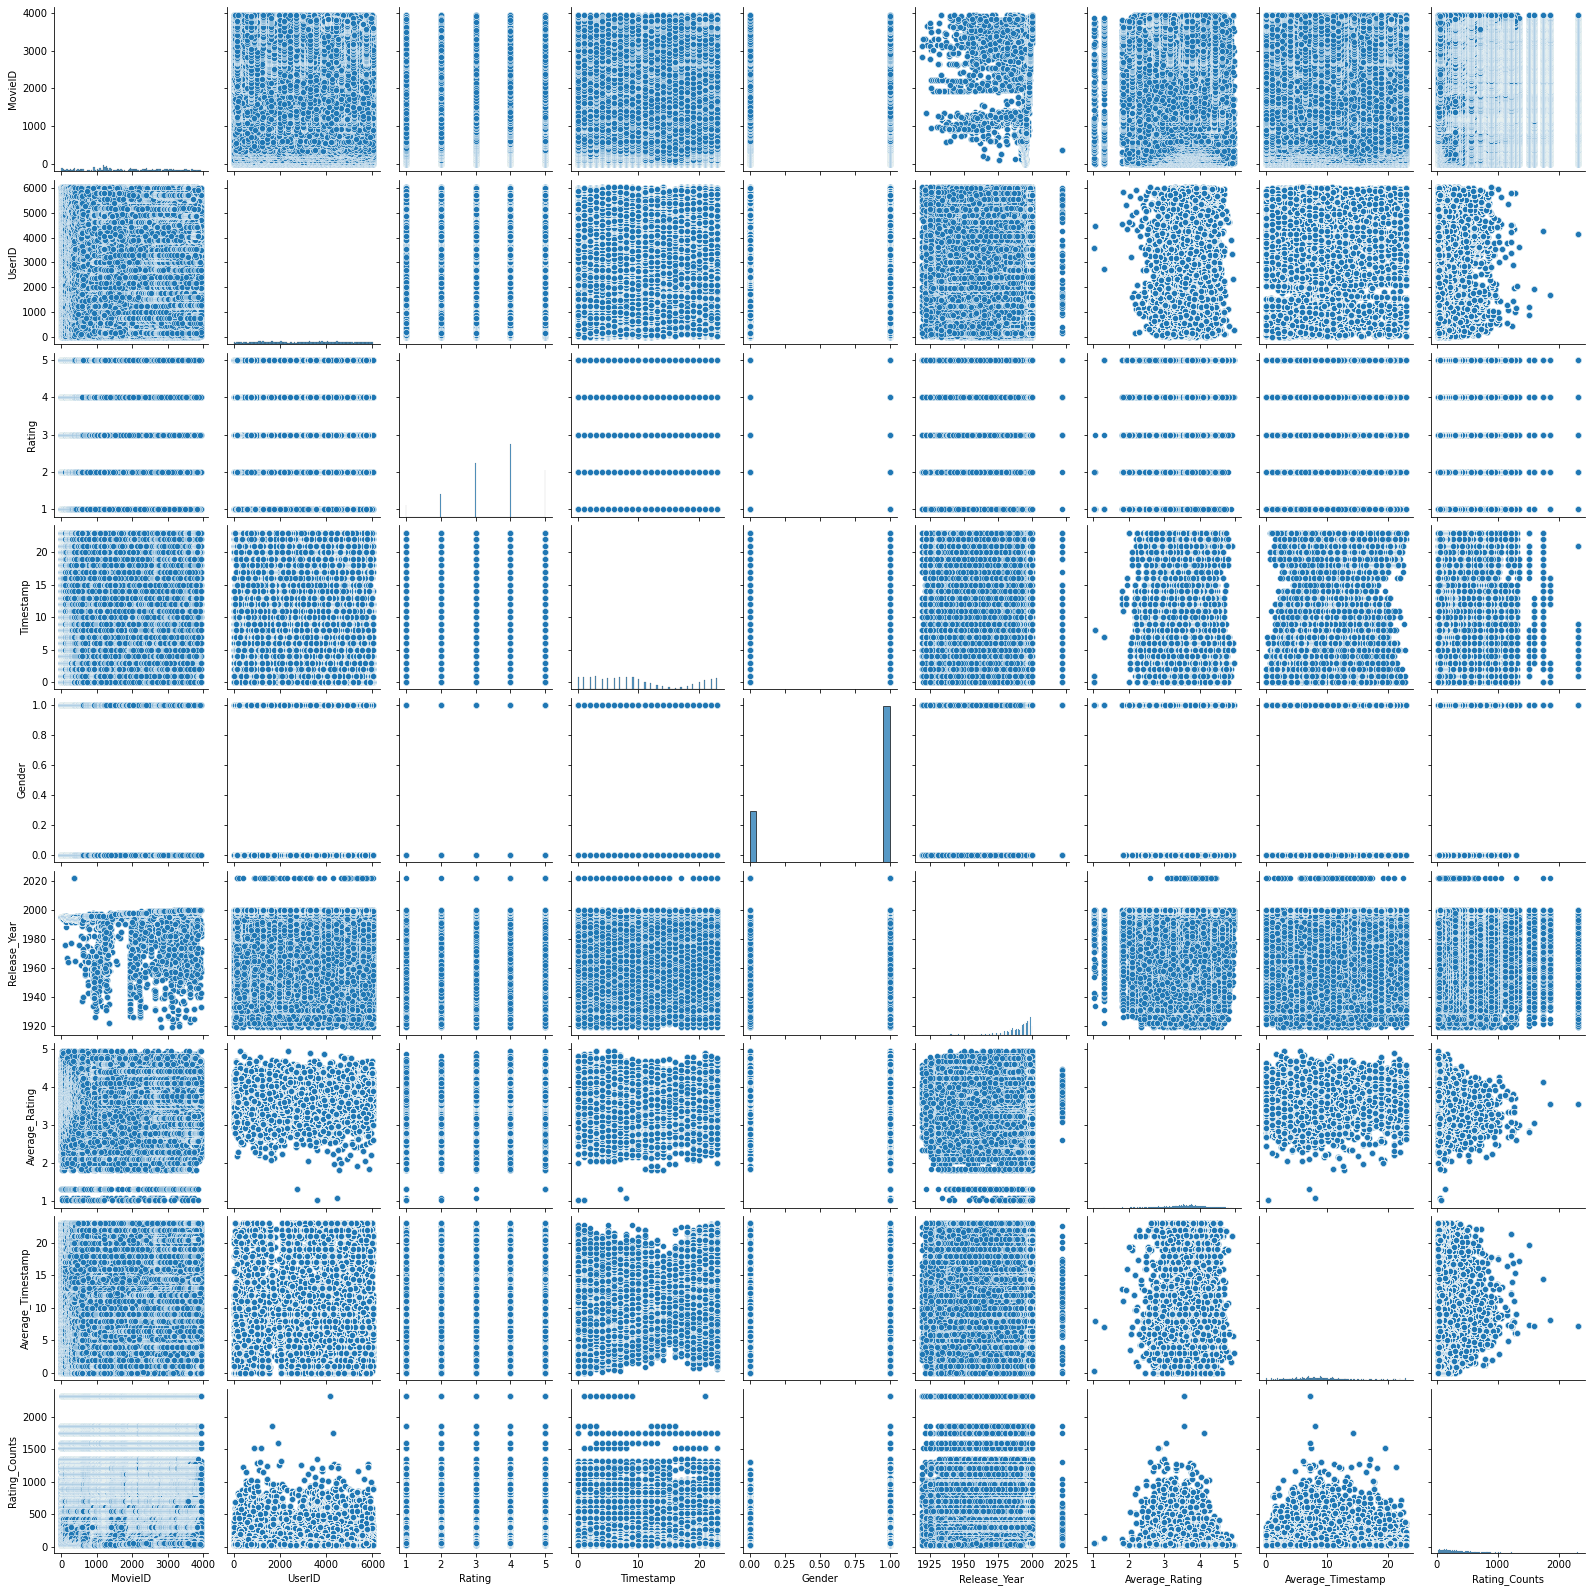

In [ ]:
sns.pairplot(df)

In [ ]:
## correlation matrix for heat map
df.corr()

,MovieID,UserID,Rating,Timestamp,Gender,Release_Year,Average_Rating,Average_Timestamp,Rating_Counts
MovieID,1.000000e+00,-0.017739,-0.064042,-4.194630e-07,0.021626,-0.014331,-0.010567,0.003860,0.003546
UserID,-1.773874e-02,1.000000,0.012303,7.530986e-03,-0.035042,-0.031756,0.031513,0.009826,-0.025618
Rating,-6.404197e-02,0.012303,1.000000,3.044366e-03,-0.019861,-0.156710,0.390412,-0.000791,-0.121277
Timestamp,-4.194630e-07,0.007531,0.003044,1.000000e+00,0.005605,0.003783,-0.001553,0.766407,0.018341
Gender,2.162585e-02,-0.035042,-0.019861,5.604816e-03,1.000000,-0.002870,-0.050871,0.007313,0.084048
Release_Year,-1.433067e-02,-0.031756,-0.156710,3.782918e-03,-0.002870,1.000000,-0.084475,0.003421,-0.010144
Average_Rating,-1.056743e-02,0.031513,0.390412,-1.553030e-03,-0.050871,-0.084475,1.000000,-0.002026,-0.310640
Average_Timestamp,3.859566e-03,0.009826,-0.000791,7.664068e-01,0.007313,0.003421,-0.002026,1.000000,0.023931
Rating_Counts,3.545522e-03,-0.025618,-0.121277,1.834092e-02,0.084048,-0.010144,-0.310640,0.023931,1.000000


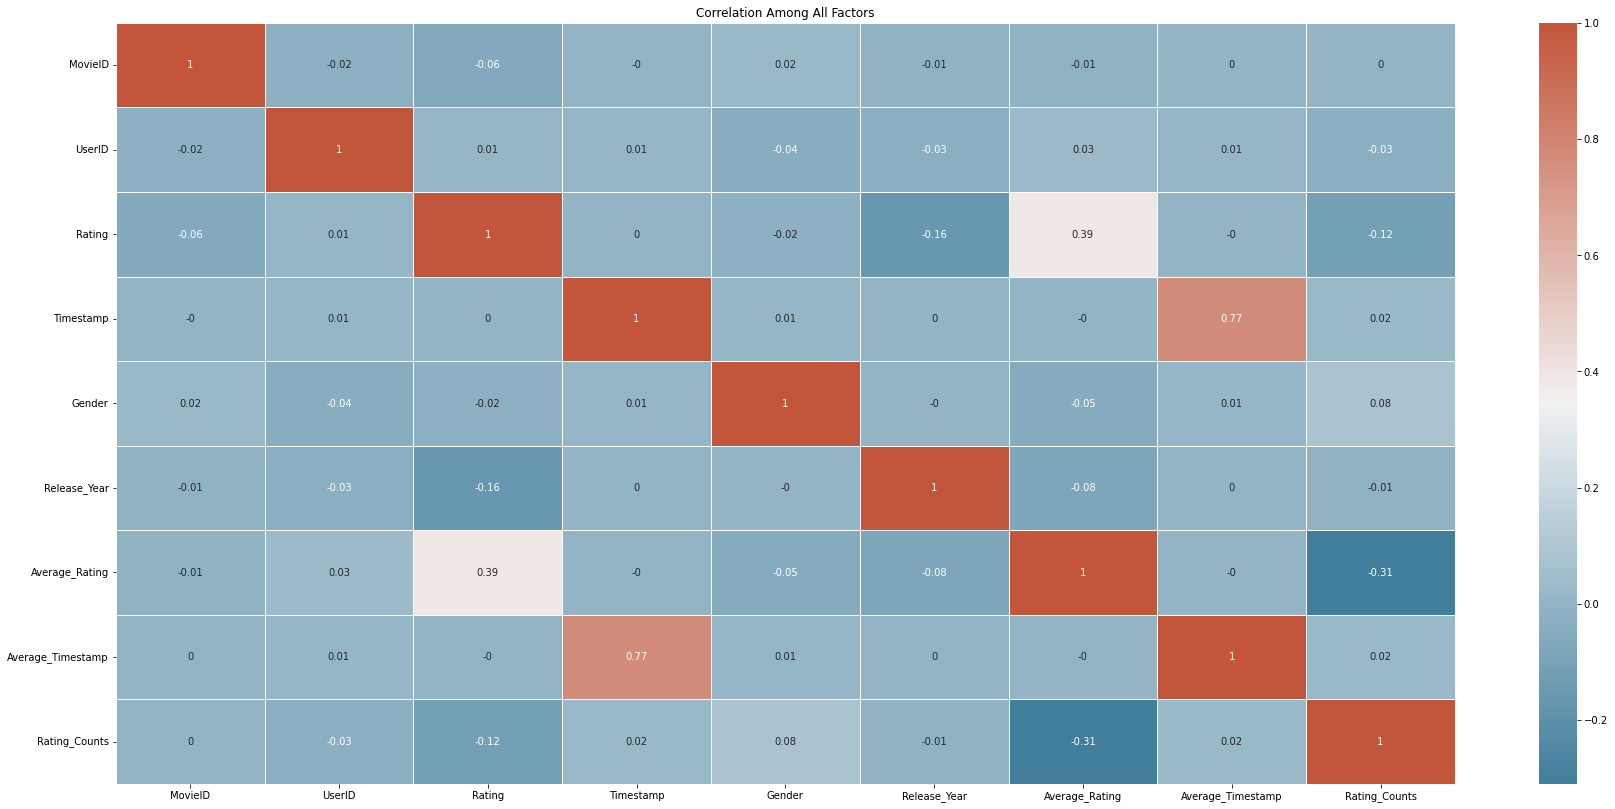

In [ ]:
df_corr = df.corr()
plt.figure(figsize=(30,14))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.title('Correlation Among All Factors')
sns.heatmap(np.round(df_corr,2), annot=True, linewidths=.5, linecolor='white', cmap=cmap)
plt.show()

In [ ]:
## spearman correlation matrix for heat map, used for better understanding 
df.corr('spearman')

,MovieID,UserID,Rating,Timestamp,Gender,Release_Year,Average_Rating,Average_Timestamp,Rating_Counts
MovieID,1.000000,-0.016358,-0.069925,-0.000620,0.022176,0.059838,-0.012372,0.004063,-0.004686
UserID,-0.016358,1.000000,0.011907,-0.010179,-0.034450,-0.046144,0.027672,-0.002867,-0.023003
Rating,-0.069925,0.011907,1.000000,0.000185,-0.020561,-0.139926,0.377692,-0.004312,-0.137638
Timestamp,-0.000620,-0.010179,0.000185,1.000000,0.005109,0.004580,-0.007997,0.742848,0.024052
Gender,0.022176,-0.034450,-0.020561,0.005109,1.000000,-0.020559,-0.051195,0.008085,0.076869
Release_Year,0.059838,-0.046144,-0.139926,0.004580,-0.020559,1.000000,-0.078602,0.002627,-0.037513
Average_Rating,-0.012372,0.027672,0.377692,-0.007997,-0.051195,-0.078602,1.000000,-0.010600,-0.343586
Average_Timestamp,0.004063,-0.002867,-0.004312,0.742848,0.008085,0.002627,-0.010600,1.000000,0.073862
Rating_Counts,-0.004686,-0.023003,-0.137638,0.024052,0.076869,-0.037513,-0.343586,0.073862,1.000000


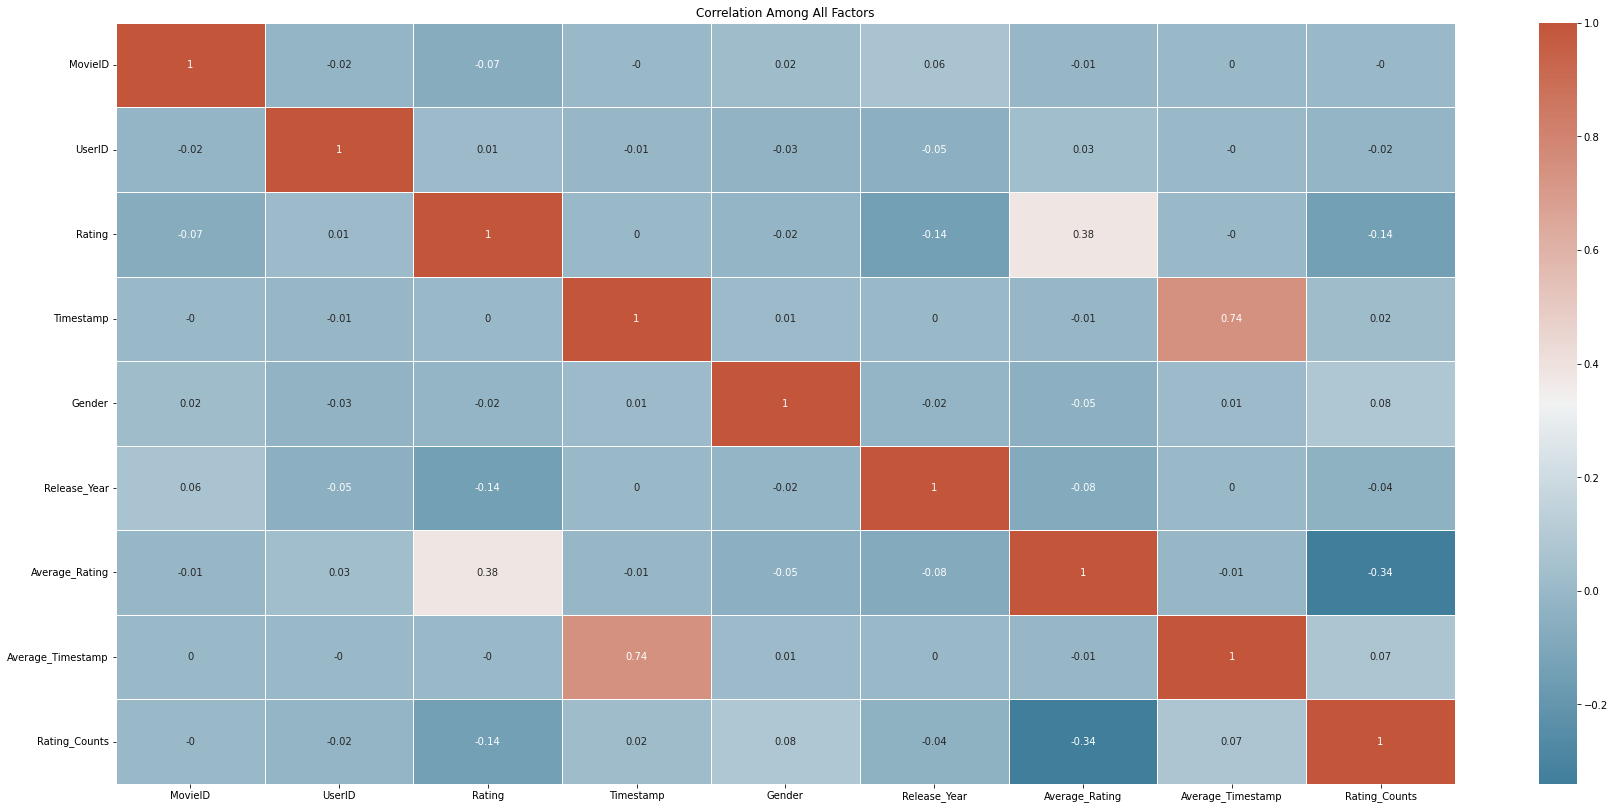

In [ ]:
df_corr = df.corr('spearman')
plt.figure(figsize=(30,14))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.title('Correlation Among All Factors')
sns.heatmap(np.round(df_corr,2), annot=True, linewidths=.5, linecolor='white', cmap=cmap)
plt.show()

In [ ]:
df

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Release_Year,Average_Rating,Average_Timestamp,Rating_Counts
0,1,toy story,Animation|Children's|Comedy,1,5,5,0,Under 18,K-12 student,48067,1995,4.188679,3.792453,53
1,48,pocahontas,Animation|Children's|Musical|Romance,1,5,5,0,Under 18,K-12 student,48067,1995,4.188679,3.792453,53
2,150,apollo,Drama,1,5,3,0,Under 18,K-12 student,48067,1995,4.188679,3.792453,53
3,260,star wars episode iv a new hope,Action|Adventure|Fantas,1,4,3,0,Under 18,K-12 student,48067,1977,4.188679,3.792453,53
4,527,schindlers list,Drama|War,1,5,5,0,Under 18,K-12 student,48067,1993,4.188679,3.792453,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,3513,rules of engagement,Drama|Thriller,5727,4,20,1,25-34,college/grad student,92843,2000,3.176471,20.392157,51
1000205,3535,american psycho,Comedy|Horror|Thriller,5727,2,20,1,25-34,college/grad student,92843,2000,3.176471,20.392157,51
1000206,3536,keeping the faith,Comedy|Romance,5727,5,20,1,25-34,college/grad student,92843,2000,3.176471,20.392157,51
1000207,3555,u,Action|Thriller,5727,3,20,1,25-34,college/grad student,92843,2000,3.176471,20.392157,51


In [ ]:
df.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zip-code', 'Release_Year', 'Average_Rating',
       'Average_Timestamp', 'Rating_Counts'],
      dtype='object')

In [42]:
m = df.copy()
m['Genres'] = m['Genres'].str.split('|')
m = m.explode('Genres')
m 

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Release_Year,Average_Rating,Average_Timestamp,Rating_Counts
0,1,toy story,Animation,1,5,23,F,Under 18,K-12 student,48067,1995,4.188679,22.245283,53
0,1,toy story,Children's,1,5,23,F,Under 18,K-12 student,48067,1995,4.188679,22.245283,53
0,1,toy story,Comedy,1,5,23,F,Under 18,K-12 student,48067,1995,4.188679,22.245283,53
1,48,pocahontas,Animation,1,5,23,F,Under 18,K-12 student,48067,1995,4.188679,22.245283,53
1,48,pocahontas,Children's,1,5,23,F,Under 18,K-12 student,48067,1995,4.188679,22.245283,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000206,3536,keeping the faith,Romance,5727,5,15,M,25-34,college/grad student,92843,2000,3.176471,15.000000,51
1000207,3555,u,Action,5727,3,15,M,25-34,college/grad student,92843,2000,3.176471,15.000000,51
1000207,3555,u,Thriller,5727,3,15,M,25-34,college/grad student,92843,2000,3.176471,15.000000,51
1000208,3578,gladiator,Action,5727,5,15,M,25-34,college/grad student,92843,2000,3.176471,15.000000,51


In [43]:
# Creates a pivot table dataframe
table = pd.pivot_table(df, index =['UserID'],columns=['Title'])

In [ ]:
table

Average_Rating  \
UserID Title                                                       
1      airplane                                         4.188679   
       aladdin                                          4.188679   
       antz                                             4.188679   
       apollo                                           4.188679   
       awakenings                                       4.188679   
...                                                          ...   
6040   wizard of oz the                                 3.577713   
       woman in the dunes                               3.577713   
       women on the verge of a nervous breakdown        3.577713   
       year of living dangerously                       3.577713   
       young frankenstein                               3.577713   

                                                  Average_Timestamp  Gender  \
UserID Title                                                                  
1      airplane                                            3.792453       0   
       aladdin                                             3.792453       0   
       antz                                                3.792453       0   
       apollo                                              3.792453       0   
       awakenings                                          3.792453       0   
...                                                             ...     ...   
6040   wizard of oz the                                   10.826979       1   
       woman in the dunes                                 10.826979       1   
       women on the verge of a nervous breakdown          10.826979       1   
       year of living dangerously                         10.826979       1   
       young frankenstein                                 10.826979       1   

                                                  MovieID  Rating  \
UserID Title                                                        
1      airplane                                    2791.0     4.0   
       aladdin                                      588.0     4.0   
       antz                                        2294.0     4.0   
       apollo                                       150.0     5.0   
       awakenings                                  3105.0     5.0   
...                                                   ...     ...   
6040   wizard of oz the                             919.0     5.0   
       woman in the dunes                          3224.0     5.0   
       women on the verge of a nervous breakdown   3067.0     4.0   
       year of living dangerously                  2919.0     5.0   
       young frankenstein                          1278.0     4.0   

                                                  Rating_Counts  Release_Year  \
UserID Title                                                                    
1      airplane                                              53        1980.0   
       aladdin                                               53        1992.0   
       antz                                                  53        1998.0   
       apollo                                                53        1995.0   
       awakenings                                            53        1990.0   
...                                                         ...           ...   
6040   wizard of oz the                                     341        1939.0   
       woman in the dunes                                   341        1964.0   
       women on the verge of a nervous breakdown            341        1988.0   
       year of living dangerously                           341        1982.0   
       young frankenstein                                   341        1974.0   

                                                  Timestamp  
UserID Title                                                 
1      airplane                                         4.0  

# ITEM BASED APPROACH

# Build a Recommender System based on Pearson Correlation

In [ ]:
# Creates a pivot table dataframe
table1 = pd.pivot_table(df, index ='UserID',columns='Title',values='Rating').fillna(0)
table1

Title,,a chef in love,a space odyssey,abbott and costello meet frankenstein,abominable snowman the,about adam,about last night,above the rim,absent minded professor the,absolute power,...,young guns ii,young poisoners handbook the,young sherlock holmes,your friends and neighbors,youve got mail,zachariah,zed two noughts a,zero effect,zero kelvin,zeus and roxanne
UserID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,2.0,0.0,5.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6037,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Top similar 5 movies for movie 'adam adam'
print("here are a list of 5 movies to recommend to a user who has liked 'about adam'")
print(table1.corr()['about adam'].sort_values(ascending=False).iloc[1:6])

here are a list of 5 movies to recommend to a user who has liked 'about adam'
Title
identification of a woman        0.387823
separation the                   0.369745
cheetah                          0.269400
safe passage                     0.267653
smiling fish and goat on fire    0.242155
Name: about adam, dtype: float64


In [ ]:
# Take input from user
print("please input the Movie name:")
a=input()
#Printing Top 5 similar Movies for recommendation
print("The Top 5 Similar Movies are:")
print(table1.corr()[a].sort_values(ascending=False).iloc[1:6])

please input the Movie name:
liar liar
The Top 5 Similar Movies are:
Title
mrs doubtfire                0.499927
dumb  dumber                 0.459601
ace ventura pet detective    0.458654
home alone                   0.453982
wedding singer the           0.429222
Name: liar liar, dtype: float64


# Build a Recommender System based on Cosine Similarity

In [ ]:
df.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zip-code', 'Release_Year', 'Average_Rating',
       'Average_Timestamp', 'Rating_Counts'],
      dtype='object')

In [68]:
n_users=df1['UserID'].unique().shape[0]
n_movies=df1['MovieID'].unique().shape[0]

In [69]:
df1

,MovieID,UserID,Rating,Timestamp
0,1,1,5,23
1,48,1,5,23
2,150,1,5,22
3,260,1,4,22
4,527,1,5,23
...,...,...,...,...
1000204,3513,5727,4,15
1000205,3535,5727,2,15
1000206,3536,5727,5,15
1000207,3555,5727,3,15


In [ ]:
n_movies

3706

In [ ]:
n_users

6040

In [65]:
df1=df[['MovieID','UserID','Rating','Timestamp']]

In [66]:
# splitting the data into train and test with some test size
from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(df1, test_size=0.25)

In [70]:
#create two user-item matrices, one for training and one for testing
train_data_matrix=np.zeros((n_users,n_users))
for line in train_data.itertuples():
    train_data_matrix[line[1]-1,line[2]-1]=line[3]
    
test_data_matrix=np.zeros((n_users,n_users))
for line in test_data.itertuples():
    test_data_matrix[line[1]-1,line[2]-1]=line[3]
    

In [71]:
from sklearn.metrics import pairwise_distances
user_similarity=pairwise_distances(train_data_matrix,metric='cosine')
movie_similarity=pairwise_distances(train_data_matrix.T,metric='cosine')

In [72]:
user_similarity

array([[0.        , 0.70862354, 0.78899454, ..., 1.        , 1.        ,
        1.        ],
       [0.70862354, 0.        , 0.8325387 , ..., 1.        , 1.        ,
        1.        ],
       [0.78899454, 0.8325387 , 0.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 0.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.        ]])

In [73]:
movie_similarity

array([[0.        , 0.97083723, 0.85634789, ..., 1.        , 0.82574477,
        0.90949067],
       [0.97083723, 0.        , 0.88740759, ..., 0.91398256, 0.94232687,
        0.83854803],
       [0.85634789, 0.88740759, 0.        , ..., 0.8960181 , 0.92773137,
        0.91262829],
       ...,
       [1.        , 0.91398256, 0.8960181 , ..., 0.        , 0.90020346,
        0.95189358],
       [0.82574477, 0.94232687, 0.92773137, ..., 0.90020346, 0.        ,
        0.84721853],
       [0.90949067, 0.83854803, 0.91262829, ..., 0.95189358, 0.84721853,
        0.        ]])

In [ ]:
#CSR MATRIX
from scipy.sparse import csr_matrix
csr_sample = csr_matrix(train_data_matrix)

In [ ]:
csr_sample

<6040x3706 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [ ]:
# NearestNeighbors to find similar movies to recommend
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=3, n_jobs=-1)
knn.fit(csr_sample)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=3)

In [ ]:
#this if For user ID 1 top 10
dataset_sort_des = df1.sort_values(['UserID', 'Timestamp'], ascending=[True, False])
filter1 = dataset_sort_des[dataset_sort_des['UserID'] == 1].MovieID
filter1 = filter1.tolist()
filter1 = filter1[1:11]
print("Movies liked by user: ",filter1)

Movies liked by user:  [48, 527, 588, 595, 745, 783, 1545, 1566, 1907, 2294]


In [ ]:
#Top 5 Movies to be recommend 
indices1=[]
for i in filter1:
    distances , indices = knn.kneighbors(csr_sample[i],n_neighbors=5)
    indices = indices.flatten()
    indices= indices[:]
    indices1.extend(indices)
print("Movies to be recommended: ",indices1[:5])

Movies to be recommended:  [4028, 4030, 4026, 4027, 4024]


# Build a Recommender System based on Matrix Factorization

In [44]:
df.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zip-code', 'Release_Year', 'Average_Rating',
       'Average_Timestamp', 'Rating_Counts'],
      dtype='object')

In [52]:
rm_raw = df[['UserID', 'MovieID', 'Rating']].copy()
rm_raw.columns = ['UserId', 'ItemId', 'Rating']  # Lib requires specific column names
rm_raw.head(2)

,UserId,ItemId,Rating
0,1,1,5
1,1,48,5


In [122]:
# user-user similarity
A=np.dot(movie_similarity,movie_similarity.T)
A

array([[4975.95662026, 4795.18624571, 4957.21969673, ..., 5221.23875011,
        5058.2122965 , 4790.83277122],
       [4795.18624571, 4650.23303196, 4791.66206451, ..., 5044.85210456,
        4882.90035632, 4631.59239741],
       [4957.21969673, 4791.66206451, 4961.89375542, ..., 5214.61435915,
        5048.64012786, 4783.4640469 ],
       ...,
       [5221.23875011, 5044.85210456, 5214.61435915, ..., 5502.62573274,
        5321.83037603, 5039.62367852],
       [5058.2122965 , 4882.90035632, 5048.64012786, ..., 5321.83037603,
        5165.73169722, 4887.19981891],
       [4790.83277122, 4631.59239741, 4783.4640469 , ..., 5039.62367852,
        4887.19981891, 4646.55543967]])

In [124]:
from cmfrec import CMF
model = CMF(method="als", k=4, lambda_=0.1, user_bias=False, item_bias=False, verbose=False)
model.fit(A)

Collective matrix factorization model
(explicit-feedback variant)


In [127]:
model.A_

array([[ 0.6460251 , -0.11107282, -0.43937227,  0.2277212 ],
       [ 0.37310788, -0.2032553 , -0.4459913 , -0.20065369],
       [ 0.6987409 ,  0.36807853, -0.6539071 , -0.14465402],
       ...,
       [ 0.9711043 ,  0.7407504 , -0.7458817 ,  0.41828975],
       [ 1.2344    ,  0.16662493, -0.52878594,  0.21995904],
       [ 0.9724865 , -1.0462418 , -0.05547597,  0.25690633]],
      dtype=float32)

In [114]:
rm_raw.shape

(1000209, 3)

In [115]:
# splitting the data into train and test with some test size
from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(rm_raw, test_size=0.25)

In [121]:
from cmfrec import CMF
model = CMF(method="als", k=4, lambda_=0.1, user_bias=False, item_bias=False, verbose=False)
model.fit(train_data)

Collective matrix factorization model
(explicit-feedback variant)


In [117]:
train_data.shape

(750156, 3)

In [120]:
model.A_.shape, model.B_.shape

((6040, 2), (3672, 2))

In [97]:
#(user embeddings)
model.A_

array([[ 0.19631444, -0.20034248,  0.14031133, -0.02263211],
       [ 0.19596791, -0.01895978, -0.02190684,  0.16316724],
       [ 0.13321939, -0.04092108, -0.03161251,  0.18033801],
       ...,
       [ 0.16227463, -0.38203067,  0.00280904,  0.24685411],
       [ 0.29579717,  0.14952838, -0.09526196,  0.09459764],
       [ 0.3454563 , -0.05018189, -0.01689888,  0.01902681]],
      dtype=float32)

In [98]:
#(item embeddings)
model.B_

array([[-1.1408621 , -3.0027497 , -0.11030838,  0.0872587 ],
       [-2.560112  , -0.48698977, -0.09699046,  0.97320545],
       [ 3.4871678 ,  0.1257706 , -0.56435585,  3.3345582 ],
       ...,
       [-0.14776441,  0.2532218 ,  0.6022941 ,  0.39969662],
       [-0.14027245,  0.26618394,  0.74708325, -0.0528534 ],
       [-0.13417198, -0.04186602, -1.9654264 , -0.9608968 ]],
      dtype=float32)

In [100]:
train_data.Rating.mean(), model.glob_mean_

(3.580861847402407, 3.580861806869507)

In [101]:
top_items = model.topN(user=1, n=10)
df.loc[df.MovieID.isin(top_items)]

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Release_Year,Average_Rating,Average_Timestamp,Rating_Counts
79,1101,top gun,Action|Romance,6,4,4,F,50-55,homemaker,55117,1986,3.901408,4.042254,71
123,3753,patriot the,Action|Drama|War,6,5,4,F,50-55,homemaker,55117,2000,3.901408,4.042254,71
242,3147,green mile the,Drama|Thriller,8,5,2,M,25-34,programmer,11413,1999,3.884892,2.215827,139
320,1669,tango lesson the,Romance,9,3,1,M,25-34,technician/engineer,61614,1997,3.735849,1.000000,106
347,3147,green mile the,Drama|Thriller,9,4,1,M,25-34,technician/engineer,61614,1999,3.735849,1.000000,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999794,3147,green mile the,Drama|Thriller,3915,5,15,F,35-44,clerical/admin,71111,1999,3.652174,14.695652,23
999876,3753,patriot the,Action|Drama|War,159,4,22,F,45-49,other,37922,2000,3.777778,22.000000,36
999916,3753,patriot the,Action|Drama|War,4419,3,10,F,45-49,programmer,15801,2000,3.300000,10.000000,20
999949,3753,patriot the,Action|Drama|War,2697,5,2,F,50-55,technician/engineer,87031,2000,4.411765,2.470588,34


In [82]:
def predict(ratings,similarity,type='user'):
  if type=='user':
    mean_user_rating=ratings.mean(axis=1)
    ratings_diff=(ratings-mean_user_rating[:,np.newaxis])
    pred=mean_user_rating[:,np.newaxis]+similarity.dot(ratings_diff)/np.array([np.abs(similarity).sum(axis=1)])
  elif type=='item':
    pred=ratings.dot(similarity)/np.array([np.abs(similarity).sum(axis=1)])
    
  return pred

In [104]:
item_prediction=predict(train_data_matrix,movie_similarity,type='item')
user_prediction=predict(train_data_matrix,user_similarity,type='user')

In [75]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(prediction,ground_truth):
  prediction=prediction[ground_truth.nonzero()].flatten()
  ground_truth=ground_truth[ground_truth.nonzero()].flatten()
  return sqrt(mean_squared_error(prediction,ground_truth))

In [85]:
print ('User-based CF RMSE: ' + str(rmse(user_prediction,test_data_matrix)))
print ('item-based CF RMSE: ' + str(rmse(item_prediction,test_data_matrix)))

User-based CF RMSE: 3.2996376906383404
item-based CF RMSE: 3.3957302771063773


In [89]:
from sklearn.metrics import mean_absolute_percentage_error
def mape(prediction,ground_truth):
  prediction=prediction[ground_truth.nonzero()].flatten()
  ground_truth=ground_truth[ground_truth.nonzero()].flatten()
  return mean_absolute_percentage_error(prediction,ground_truth)

In [91]:
print ('User-based CF MAPE: ' + str(mape(user_prediction,test_data_matrix)))
print ('item-based CF MAPE: ' + str(mape(item_prediction,test_data_matrix)))

User-based CF MAPE: 63.94654193857207
item-based CF MAPE: 3061798645331.351


In [112]:
print ('item-based CF MAPE: for matrix(check this later) ' + str(mape(item_prediction,model.B_)))

item-based CF MAPE: for matrix(check this later) 547613936516211.56
